In [ ]:
#From: https://learnopencv.com/image-filtering-using-convolution-in-opencv/
#Images and kernel from https://www.askpython.com/python-modules/opencv-filter2d 

#upload these image files:  printed.jpg, cat_dog_hug.jfif, Lenna.png

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#this was created because Google Colab does not allow cv2.imshow, so must patch by cv2_imshow.  
#If we switch over to regular jupyter notebook not on Colab, we can change c2_imshow to cv2.imshow.  
from google.colab.patches import cv2_imshow #only used when running in Google Colab 
def my_imshow(title, img ):
  cv2_imshow(img) #should be changed to c2.imshow when not in Colab

path = ""
fileName = path + "Lenna.png" #+ "cat_dog_hug.jfif" #+ "Lenna.png" #  + "printed.jpg"  + "cat_dog_hug.jfif" + "Lenna.png"

#RGB images in BGR order in OpenCV
image = cv2.imread(fileName, cv2.IMREAD_COLOR)

# Print error message if image is null
if image is None:
    print('Could not read image')
else: 
    print("Image file read success...")

def myImshow(title, img):
    """
    function to make windows display work in jupyter notebook
    - shows image in a separate window,
    - waits for any key to close the window.

    """

    cv2.startWindowThread()
    my_imshow(title, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

[[1.00755667e-05 2.85059647e-05 6.87250219e-05 1.41190967e-04
  2.47179144e-04 3.68747952e-04 4.68770520e-04 5.07813042e-04
  4.68770520e-04 3.68747952e-04 2.47179144e-04 1.41190967e-04
  6.87250219e-05 2.85059647e-05 1.00755667e-05]
 [2.85059647e-05 8.06495603e-05 1.94438001e-04 3.99459887e-04
  6.99323439e-04 1.04326798e-03 1.32625353e-03 1.43671330e-03
  1.32625353e-03 1.04326798e-03 6.99323439e-04 3.99459887e-04
  1.94438001e-04 8.06495603e-05 2.85059647e-05]
 [6.87250219e-05 1.94438001e-04 4.68770520e-04 9.63057725e-04
  1.68599867e-03 2.51521446e-03 3.19746425e-03 3.46377167e-03
  3.19746425e-03 2.51521446e-03 1.68599867e-03 9.63057725e-04
  4.68770520e-04 1.94438001e-04 6.87250219e-05]
 [1.41190967e-04 3.99459887e-04 9.63057725e-04 1.97853777e-03
  3.46377167e-03 5.16734013e-03 6.56897674e-03 7.11608755e-03
  6.56897674e-03 5.16734013e-03 3.46377167e-03 1.97853777e-03
  9.63057725e-04 3.99459887e-04 1.41190967e-04]
 [2.47179144e-04 6.99323439e-04 1.68599867e-03 3.46377167e-03
  

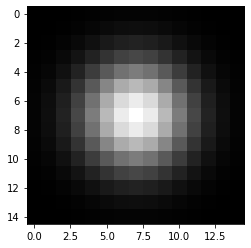

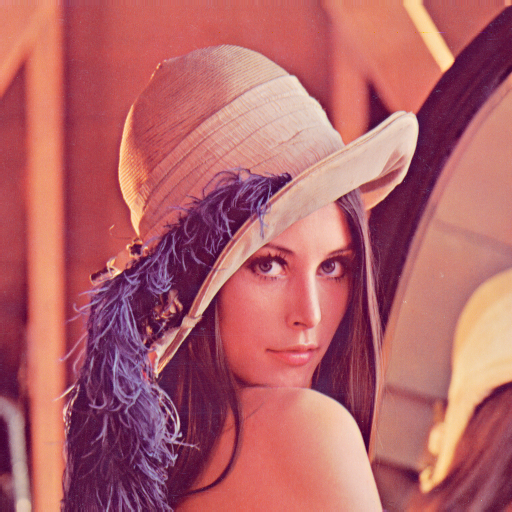

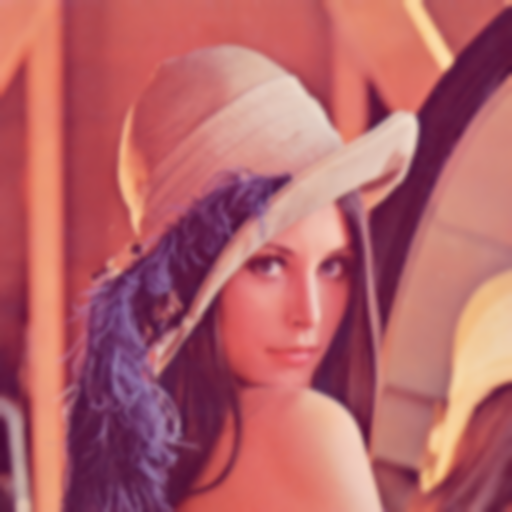

In [71]:
# Define kernel size, sigma value and initialize gaussian matrix
n = 7
sigma = 2.5
kernel_size = (2*n+1, 2*n+1)
gaussian = np.zeros(kernel_size)

# Compute the Gaussian filter
for i in range(-n, n+1):
    for j in range(-n, n+1):
        i2 = i + n
        j2 = j + n
        gaussian[i2, j2] = np.exp(-(i**2 + j**2) / (2 * sigma**2))

# Normalizing the kernel
min_val = np.min(gaussian)
gaussian = gaussian / min_val
gaussian = gaussian / gaussian.sum()
gaussian = round(gaussian, 3)

# Display gaussian filter in gray scale and matrix
print(gaussian)
plt.imshow(gaussian, cmap='gray')
plt.show()

# Apply gaussian filter and display image with filter
img = cv2.filter2D(src=image, ddepth=-1, kernel=gaussian)
my_imshow('Original', image)
my_imshow('Kernel Blur', img)
cv2.waitKey(0)
cv2.destroyAllWindows()